# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** \<Łukasz Kopciński\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


In [4]:
# ===== Twoja implementacja tutaj =====
### PUNKT 1
roots_1=[1,2,3]

p_1=nppoly.polyfromroots(roots_1)
print("Wektor wspł. a wynosi: ",p_1)


Wektor wspł. a wynosi:  [-6. 11. -6.  1.]


WNIOSKI:

- tak wektor wpółczynników a jest zgodny z definicją podaną w sekcji Cel Zajęć.

In [5]:
###PUNKT 2 - funkcja z pliku main.py
def roots_20(coef: np.ndarray) -> tuple[np.ndarray, np.ndarray] | None:
    
    if not isinstance(coef,np.ndarray):
        return None
    if coef.ndim != 1:
        return None
    
    wspl_zaburzony=coef + (10**(-10)*np.random.random_sample(coef.shape))

    vec_roots=nppoly.polyroots(wspl_zaburzony)

    return wspl_zaburzony, vec_roots

Wspł. wielomianu w2: [ 2.43290201e+18 -8.75294804e+18  1.38037598e+19 -1.28709312e+19
  8.03781182e+18 -3.59997952e+18  1.20664780e+18 -3.11333643e+17
  6.30308121e+16 -1.01422999e+16  1.30753501e+15 -1.35585183e+14
  1.13102770e+13 -7.56111184e+11  4.01717716e+10 -1.67228082e+09
  5.33279460e+07 -1.25685000e+06  2.06150000e+04 -2.10000000e+02
  1.00000000e+00]


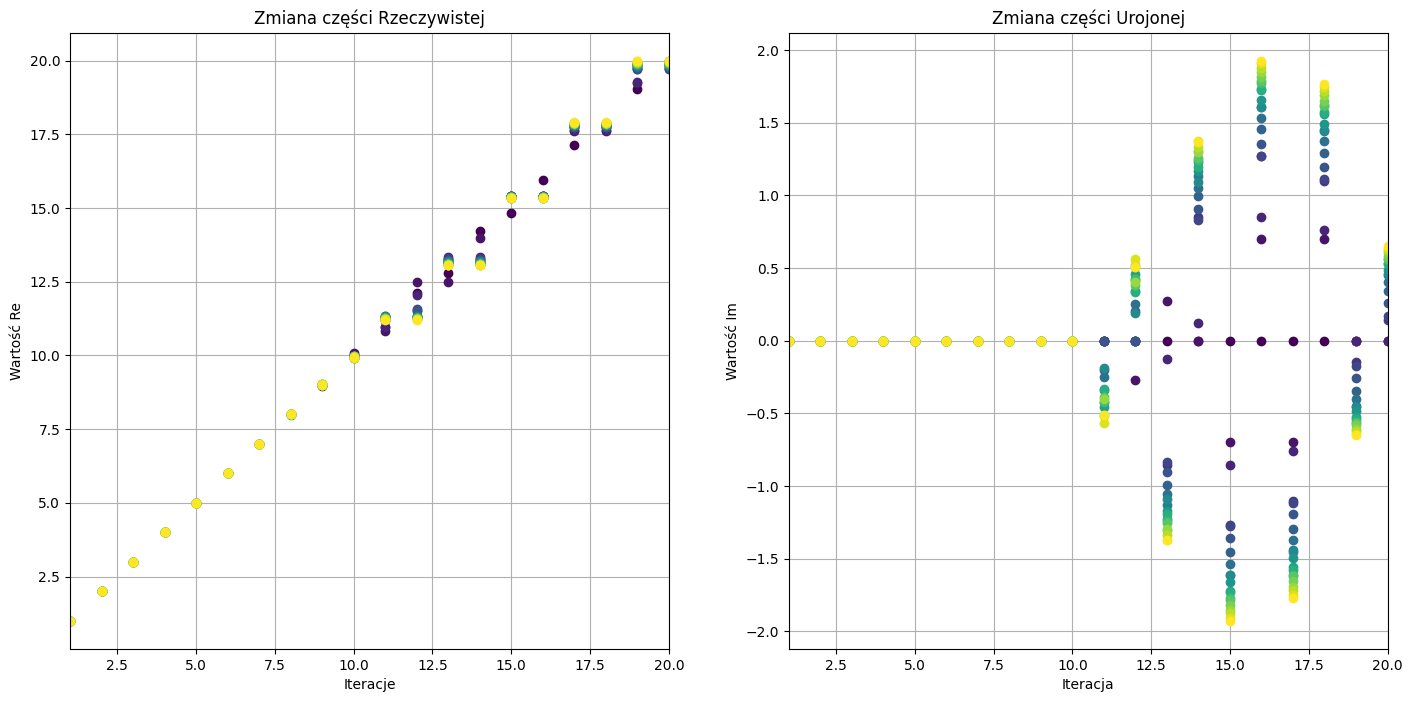

In [20]:
### PUNKT 3
w2_roots=np.linspace(1,20,20)

p_3=nppoly.polyfromroots(w2_roots)
print("Wspł. wielomianu w2:",p_3)

wszystkie_czesci_rzeczywiste = []
wszystkie_czesci_urojone = []

aktualny_wspl=p_3
for i in range(20):
    wspl_zaburzony,vec_roots=roots_20(aktualny_wspl)

    wszystkie_czesci_rzeczywiste.append(np.real(vec_roots))
    wszystkie_czesci_urojone.append(np.imag(vec_roots))

    aktualny_wspl=wspl_zaburzony

R=np.array(wszystkie_czesci_rzeczywiste)
I=np.array(wszystkie_czesci_urojone)

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(17,8))

zero_do_dwadziescia=np.linspace(1,20,20)

#ax1.plot(zero_do_dwadziescia,np.zeros_like(zero_do_dwadziescia))

colors = plt.cm.viridis(np.linspace(0, 1, 20))

for i in range(20):
    ax1.plot(zero_do_dwadziescia,R[i,:],'o',color=colors[i])
    ax2.plot(zero_do_dwadziescia,I[i,:],'o',color=colors[i])

ax1.set_title('Zmiana części Rzeczywistej')
ax1.set_xlabel('Iteracje')
ax1.set_ylabel('Wartość Re')
ax1.set_xlim(1,20)
ax1.grid(True)


ax2.set_title('Zmiana części Urojonej')
ax2.set_xlabel('Iteracja')
ax2.set_ylabel('Wartość Im')
ax2.set_xlim(1,20)
ax2.grid(True)    

WNIOSKI:

- błędy zaczęły się kumulować najbardziej od ok. 11 iteracji
- kolory jasne zółte/ turkusowe,zielone to pierwiastki skrajne, za to pierwiastki ciemne np. fioletowe to pierwiastki środkowe
- najbardziej zagrożone destabilizacją są pierwiastki środkowe
- każdy ciąg kropek o tych samych kolorach obrazuje trajektorie jednego pierwiastka przez iteracje 1-20
- z punktu wyżej wynika w takim razie, że pierwiastki IM są najbardziej podatne na zaburzenia 
- wykres pierwiastków RE jest bardziej stabilny od IM, każde pierwiastki podczas kolejnych iteracji są blisko siebie

Sposób oszacowania:

- należy użyć współczynnik uwarunkowania ki, który jest zależny od pochodnej wielomianu obliczonej w tym pierwiastku

---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

In [3]:
### funkcja z main
def frob_a(coef: np.ndarray) -> np.ndarray | None:
  
    if coef is None or not isinstance(coef, np.ndarray):
        return None
    if coef.ndim != 1:
        return None
    if coef.size < 2:
        return None
    
    a_n = coef[-1]          
    if a_n == 0:
        return None 
    
    n=coef.size-1
    I=np.eye(n-1)
    coef_final=np.delete(coef,-1)/coef[-1]
    
    zeros=np.full((n-1,1),0)
    zeros_I=np.hstack((zeros,I))
    frobenius_matrix=np.vstack((zeros_I,-(coef_final.reshape(1,-1))))
    return frobenius_matrix

 Macierz frobeniusa dla wielomianu w3

 [[  0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.]
 [ -1.   8. -28.  56. -70.  56. -28.   8.]]

Wartosci wlasne za pomocą np.linalg.eigvals:
 [1.01904738 1.01904738 1.00770347 1.00770347 0.99203361 0.99203361
 0.98121553 0.98121553]

Wartosci wlasne za pomocą sp.linalg.schur:
 [1.0179862  1.01272357 1.01272357 1.0000072  1.0000072  0.98727648
 0.98727648 0.98199929]

Pierwiastki wielomianu za pomocą nppoly.polyroots:
 [0.97789688-0.00901967j 0.97789688+0.00901967j 0.99051571-0.02210196j
 0.99051571+0.02210196j 1.00901686-0.02256938j 1.00901686+0.02256938j
 1.02257054-0.00948709j 1.02257054+0.00948709j]


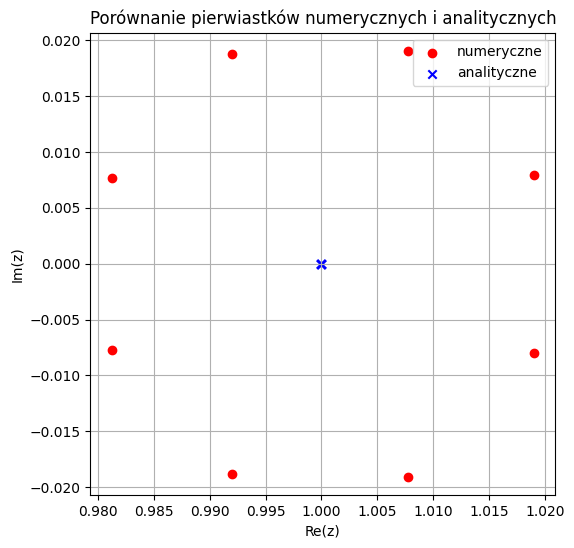

In [27]:
# ===== Twoja implementacja tutaj =====
roots_2=[1,1,1,1,1,1,1,1]
p_2=nppoly.polyfromroots(roots_2)
print(" Macierz frobeniusa dla wielomianu w3")

matrix_frobenius=frob_a(p_2)
print("\n",matrix_frobenius)

eigen_values=np.linalg.eigvals(matrix_frobenius)
print("")
print("Wartosci wlasne za pomocą np.linalg.eigvals:\n",eigen_values.real)

T,Q=sp.linalg.schur(matrix_frobenius,output='real')
T_c,Q_c=sp.linalg.rsf2csf(T,Q)
eigen_values_1=(np.diag(T_c))
print("")
print("Wartosci wlasne za pomocą sp.linalg.schur:\n",eigen_values_1.real)

pierw=nppoly.polyroots(p_2)
print("")
print("Pierwiastki wielomianu za pomocą nppoly.polyroots:\n",pierw)


analitycznie=np.array([1,1,1,1,1,1,1,1])
plt.figure(figsize=(6,6))
plt.scatter(eigen_values.real, eigen_values.imag, color='red', label='numeryczne', marker='o')
plt.scatter(analitycznie.real, analitycznie.imag, color='blue', label='analityczne', marker='x')

plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("Porównanie pierwiastków numerycznych i analitycznych")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

WNIOSKI:
- z wykresu wynika iż numerycznie (przez błędy w arytmetyce zmiennoprzecinkowej) występuje błąd. Wartości Im powinny wynosić zero, tak jak wskazuje na to metoda analityczna. Jednak na wykresie, widać że Im są bardzo małe, równomiernie rozłożone wokół punktu (1 Re, 0 Im). Dlatego małe wartości Im można ignorować.

---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

 Macierz frobeniusa dla wielomianu w3

 [[ 0.          1.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          1.        ]
 [-0.06584362  0.2962963   0.11522634 -2.2962963   4.07407407 -3.22222222  2.        ]]

Wartosci wlasne za pomocą np.linalg.eigvals:
 [ 0.          0.         -0.33333333  0.66667174  0.66666413  0.66666413  0.33333333]

Wartosci wlasne za pomocą sp.linalg.schur:
 [-0.         -0.         -0.33333333  0.66667535  0.66666232  0.66666232  0.33333333]

Pierwiastki wielomianu za pomocą nppoly.polyroots:
 [-0.33333333+0.j          0.     

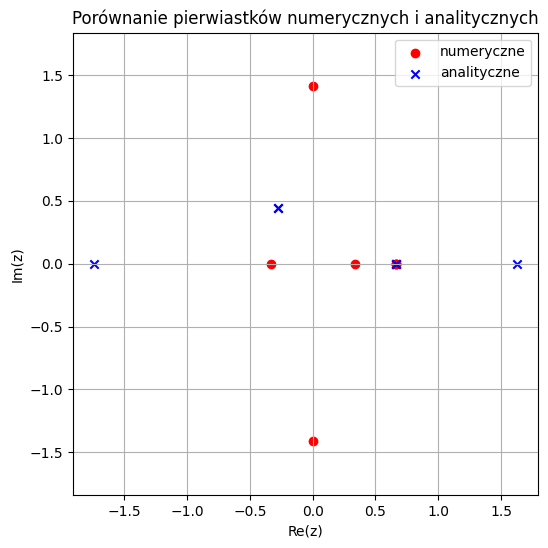

In [8]:
# ===== Twoja implementacja tutaj =====
np.set_printoptions(linewidth=200)   
np.set_printoptions(suppress=True)

p_2=np.array([16, -72, -28, 558, -990, 783, -486, 243])

print(" Macierz frobeniusa dla wielomianu w3")

matrix_frobenius=frob_a(p_2)
print("\n",matrix_frobenius)

eigen_values=np.linalg.eigvals(matrix_frobenius)
print("")
print("Wartosci wlasne za pomocą np.linalg.eigvals:\n",eigen_values.real)

T,Q=sp.linalg.schur(matrix_frobenius,output='real')
T_c,Q_c=sp.linalg.rsf2csf(T,Q)
eigen_values_1=(np.diag(T_c))
print("")
print("Wartosci wlasne za pomocą sp.linalg.schur:\n",eigen_values_1.real)

pierw=nppoly.polyroots(p_2)
print("")
print("Pierwiastki wielomianu za pomocą nppoly.polyroots:\n",pierw)


analitycznie=np.array([2/3,2/3,2/3,1.6239,-1.739,-0.2756 + 0.4457j,-0.2756 + 0.4457j])
plt.figure(figsize=(6,6))
plt.scatter(eigen_values.real, eigen_values.imag, color='red', label='numeryczne', marker='o')
plt.scatter(analitycznie.real, analitycznie.imag, color='blue', label='analityczne', marker='x')

plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("Porównanie pierwiastków numerycznych i analitycznych")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

WNIOSKI:
- widać że rozbieżność wyników wynika z niestabilności dla wielokrotnych pierwiastków - efekt obliczeń zmiennoprzecinkowych.
- numeryczne metody rozdzielają pierwiastki na kilka różnych wartości: 0.6666, 0.6667, 0.6666 + 5e-6j itp. Małe części urojone można ignorować.  
- Wyniki są dosyć rozbieżne.

---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

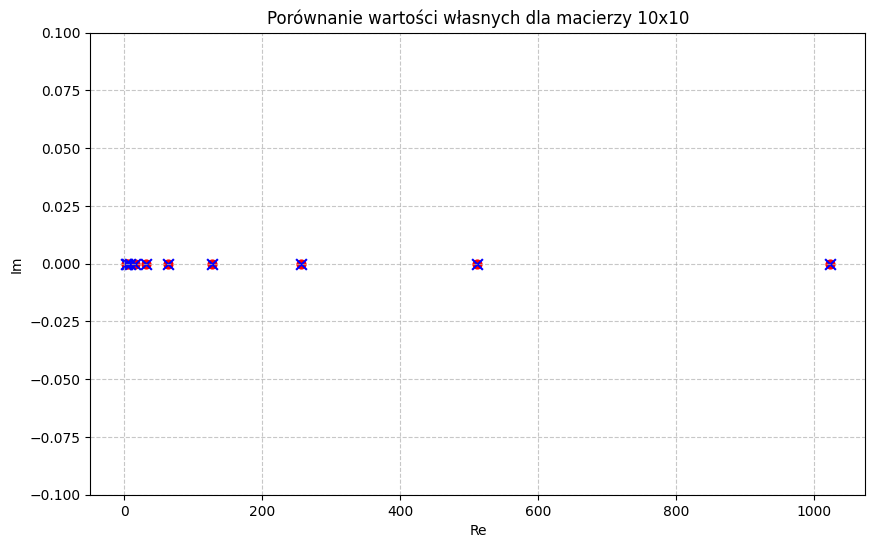

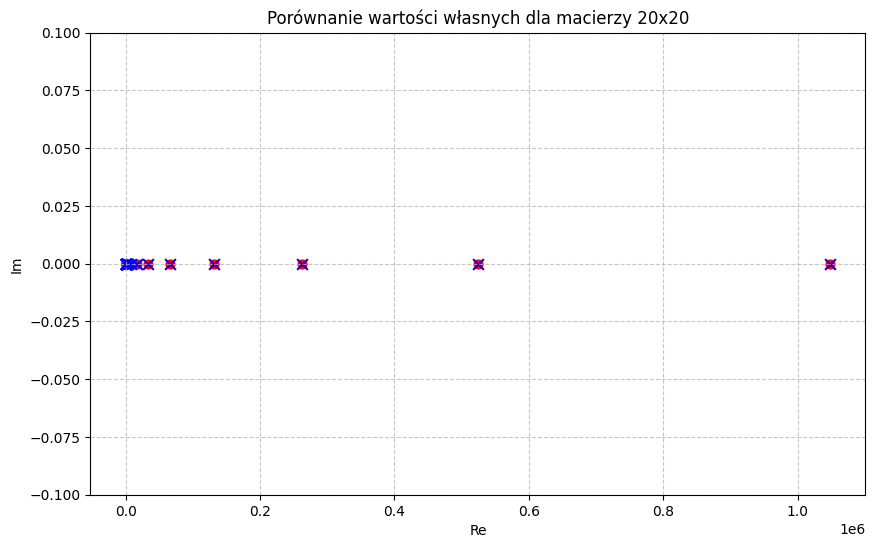

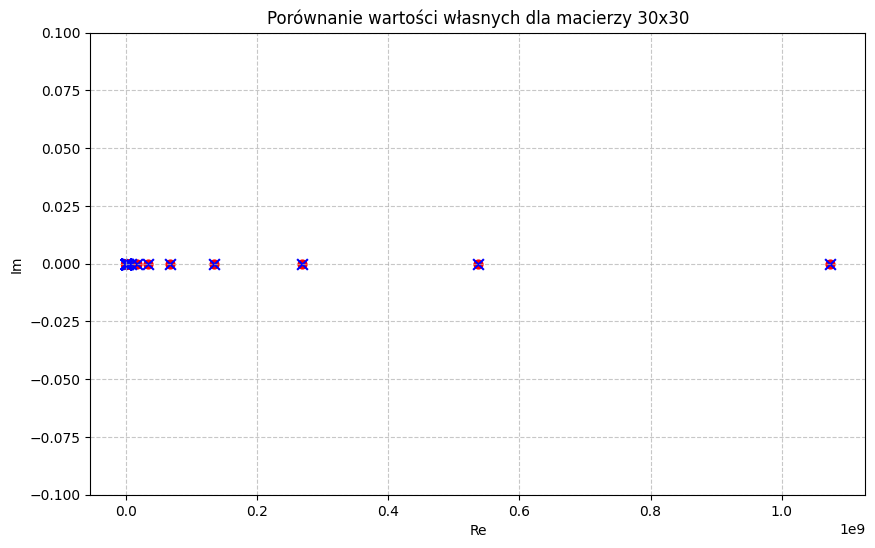

In [4]:
# ===== Twoja implementacja tutaj =====
n=[10,20,30]

a10_base=2**np.arange(1,n[0]+1)
a20_base=2**np.arange(1,n[1]+1)
a30_base=2**np.arange(1,n[2]+1)


A10=np.diag(a10_base)
A20=np.diag(a20_base)
A30=np.diag(a30_base)

A10_num=np.linalg.eigvals(A10)
A20_num=np.linalg.eigvals(A20)
A30_num=np.linalg.eigvals(A30)

As_num=[A10_num,A20_num,A30_num]
As_anal=[a10_base,a20_base,a30_base]
### Punkt 1

for j in range(len(n)):
    N = n[j]
    num_vals = As_num[j]
    anal_vals = As_anal[j]
    
    plt.figure(figsize=(10, 6))

    plt.scatter(num_vals.real, np.zeros_like(num_vals.real), 
                color='red', marker='o', s=40)
    
    plt.scatter(anal_vals, np.zeros_like(anal_vals), 
                color='blue', marker='x', s=60)
    
    plt.title(f"Porównanie wartości własnych dla macierzy {N}x{N}")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylabel("Im")
    plt.xlabel("Re")
    plt.ylim(-0.1, 0.1) 
    
    plt.show()

In [5]:
### Punkt 2 FUNKCJA Z MAIN
def is_nonsingular(A: np.ndarray) -> bool | None:
    
    if not isinstance(A,np.ndarray):
        return None
    
    if A.ndim != 2:
        return None
    
    if len(A.shape) != 2:
        return None
    
    try:
        det_A = np.linalg.det(A)
    except np.linalg.LinAlgError:
        return None
     
    epsilon=1e-12

    return abs(det_A)>epsilon

In [6]:
### Punkt 2
def generate_nonsingular_P(N):
    while True:

        P = np.random.randint(0, 100, size=(N, N))
        
        if is_nonsingular(P):
            return P

P10=generate_nonsingular_P(10)
P20=generate_nonsingular_P(20)
P30=generate_nonsingular_P(30)

P10_inv=np.linalg.inv(P10)
P20_inv=np.linalg.inv(P20)
P30_inv=np.linalg.inv(P30)

B10=P10 @ A10 @ P10_inv

B20=P20 @ A20 @ P20_inv

B30=P30 @ A30 @ P30_inv

eig_vals_B10=np.linalg.eigvals(B10)
eig_vals_B20=np.linalg.eigvals(B20)
eig_vals_B30=np.linalg.eigvals(B30)

print("Wartości własne numerycznie dla n=10: \n", eig_vals_B10)
print("Wartości własne numerycznie dla n=20: \n", eig_vals_B20)
print("Wartości własne numerycznie dla n=30: \n", eig_vals_B30)

Wartości własne numerycznie dla n=10: 
 [1024.  512.  256.  128.   64.   32.   16.    8.    4.    2.]
Wartości własne numerycznie dla n=20: 
 [1.048576e+06 5.242880e+05 2.621440e+05 1.310720e+05 6.553600e+04
 3.276800e+04 1.638400e+04 8.192000e+03 4.096000e+03 2.048000e+03
 1.024000e+03 5.120000e+02 2.560000e+02 1.280000e+02 6.400000e+01
 3.200000e+01 1.600000e+01 8.000000e+00 4.000000e+00 2.000000e+00]
Wartości własne numerycznie dla n=30: 
 [1.07374182e+09 5.36870912e+08 2.68435456e+08 1.34217728e+08
 6.71088640e+07 3.35544320e+07 1.67772160e+07 8.38860800e+06
 4.19430400e+06 2.09715200e+06 1.04857600e+06 5.24288000e+05
 2.62144000e+05 1.31072000e+05 6.55360000e+04 3.27680000e+04
 1.63840000e+04 8.19199999e+03 4.09600001e+03 2.04799999e+03
 1.02400000e+03 5.11999997e+02 2.55999992e+02 1.28000001e+02
 6.40000021e+01 3.20000039e+01 1.60000041e+01 2.00000003e+00
 4.00000829e+00 7.99999932e+00]


WNIOSKI:
- wartości własne policzone analitycznie oraz numerycznie są prawie identyczne! Dzieje się tak ponieważ B i A to macierze podobne. Jedyny błąd który wystąpił to przesunięcie wartości 4 i 8 dla n=30.


In [15]:
### Punkt 3
Q10, R10 = np.linalg.qr(P10)
Q20, R20 = np.linalg.qr(P20)
Q30, R30 = np.linalg.qr(P30)

Qs = [Q10, Q20, Q30]
As = [A10, A20, A30]

C10 = Q10 @ A10 @ Q10.T
C20 = Q20 @ A20 @ Q20.T
C30 = Q30 @ A30 @ Q30.T

Cs = [C10, C20, C30]

C10_num = np.linalg.eigvals(C10)
C20_num = np.linalg.eigvals(C20)
C30_num = np.linalg.eigvals(C30)



print("Wartości własne z rozkładu QR dla n=10: \n",C10_num)
print("Wartości własne z rozkładu QR dla n=20: \n",C20_num)
print("Wartości własne z rozkładu QR dla n=30: \n",C30_num)

Wartości własne z rozkładu QR dla n=10: 
 [1024.  512.  256.  128.   64.   32.   16.    8.    2.    4.]
Wartości własne z rozkładu QR dla n=20: 
 [1.048576e+06 5.242880e+05 2.621440e+05 1.310720e+05 6.553600e+04
 3.276800e+04 1.638400e+04 8.192000e+03 4.096000e+03 2.048000e+03
 1.024000e+03 5.120000e+02 2.560000e+02 1.280000e+02 6.400000e+01
 3.200000e+01 1.600000e+01 8.000000e+00 4.000000e+00 2.000000e+00]
Wartości własne z rozkładu QR dla n=30: 
 [1.07374182e+09 5.36870912e+08 2.68435456e+08 1.34217728e+08
 6.71088640e+07 3.35544320e+07 1.67772160e+07 8.38860800e+06
 4.19430400e+06 2.09715200e+06 1.04857600e+06 5.24288000e+05
 2.62144000e+05 1.31072000e+05 6.55360000e+04 3.27680000e+04
 1.63840000e+04 8.19200000e+03 4.09600000e+03 2.04800000e+03
 1.02400000e+03 5.12000000e+02 2.56000000e+02 1.28000000e+02
 6.40000000e+01 3.20000000e+01 1.60000000e+01 8.00000000e+00
 1.99999999e+00 4.00000000e+00]


WNIOSKI:
- wartości wyliczone poprzez rozkład QR są prawie że identyczne, różnicą jest to że tym razem dla n=30, tylko 2 wartości są nienamiejscu. Porównując z wersją analityczną - wersja numeryczna zawiera kilka drobnych błędów.

In [17]:
### Punkt 4
n=[10,20,30]

a10_base=2**np.arange(1,n[0]+1)
a20_base=2**np.arange(1,n[1]+1)
a30_base=2**np.arange(1,n[2]+1)

p_3_1=np.poly(a10_base)
p_3_2=np.poly(a20_base)
p_3_3=np.poly(a30_base)

p_3_1_odwr=p_3_1[::-1]
p_3_2_odwr=p_3_2[::-1]
p_3_3_odwr=p_3_3[::-1]

frobenius_a10=frob_a(p_3_1_odwr)
frobenius_a20=frob_a(p_3_2_odwr)
frobenius_a30=frob_a(p_3_3_odwr)

war_wlasne_frob_10=np.linalg.eigvals(frobenius_a10)
war_wlasne_frob_20=np.linalg.eigvals(frobenius_a20)
war_wlasne_frob_30=np.linalg.eigvals(frobenius_a30)


print("Wartości własne z m Frobeniusa dla n=10: \n",war_wlasne_frob_10)
print("Wartości własne z m Frobeniusa dla n=20: \n",war_wlasne_frob_20)
print("Wartości własne z m Frobeniusa dla n=30: \n",war_wlasne_frob_30)

Wartości własne z m Frobeniusa dla n=10: 
 [1024.  512.  256.  128.   64.   32.   16.    8.    4.    2.]
Wartości własne z m Frobeniusa dla n=20: 
 [1.048576e+06 5.242880e+05 2.621440e+05 1.310720e+05 6.553600e+04
 3.276800e+04 1.638400e+04 8.192000e+03 4.096000e+03 2.048000e+03
 1.024000e+03 5.120000e+02 2.560000e+02 1.280000e+02 6.400000e+01
 3.200000e+01 1.600000e+01 8.000000e+00 4.000000e+00 2.000000e+00]
Wartości własne z m Frobeniusa dla n=30: 
 [1.67772160e+07 8.38860800e+06 4.19430400e+06 2.09715200e+06
 1.04857600e+06 5.24288000e+05 2.62144000e+05 1.31072000e+05
 6.55360000e+04 3.27680000e+04 1.63840000e+04 8.19200000e+03
 4.09600000e+03 2.04800000e+03 1.02400000e+03 5.12000000e+02
 2.56000000e+02 1.28000000e+02 6.40000000e+01 3.20000000e+01
 1.60000000e+01 8.00000000e+00 4.00000000e+00 2.00000000e+00
 9.99999995e-01 5.00000017e-01 2.49999968e-01 1.25000029e-01
 3.12499990e-02 6.24999899e-02]


In [ ]:
suma_base=a30_base.sum()
suma_B=eig_vals_B30.sum()
suma_C=C30_num.sum()
suma_FR=frobenius_a30.sum()
print("Błąd dla metody macierzy podobnych: ",abs(suma_base-suma_B)/30)
print("Błąd dla metody rozkkładu QR: ",abs(suma_base-suma_C)/30 )
print("Błąd dla metody macierzy Frobeniusa: ",abs(suma_base-suma_FR)/30)

Błąd dla metody macierzy podobnych:  1.5894571940104166e-08
Błąd dla metody rozkkładu QR:  7.947285970052083e-08
Błąd dla metody macierzy Frobeniusa:  9.170774516039301e+137


WNIOSKI:
- z przeprowadzonej analizy wynika że metoda z macierza Frobeniusa przyniosła największe błędy.

PODSUMOWANIE:
- błędy w wartościach własnych wynikają głównie z arytmetyki zmiennoprzecinkowej na komputerze. Im większa rozbieżność - tzn rozbieżność wartości własnych - tym bardziej widoczne stają się problemy i błędy. 


**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)